In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [2]:
# 读入文件
train_data_df = pd.read_csv("../data/traindata.csv")
train_label_df = pd.read_csv("../data/trainlabel.txt")
features = train_data_df.columns

# 数值填充
train_data_df.replace('Preschool', 1, inplace=True)
train_data_df.replace('1st-4th', 2, inplace=True)
train_data_df.replace('5th-6th', 3, inplace=True)
train_data_df.replace('7th-8th', 4, inplace=True)
train_data_df.replace('9th', 5, inplace=True)
train_data_df.replace('10th', 6, inplace=True)
train_data_df.replace('11th', 7, inplace=True)
train_data_df.replace('12th', 8, inplace=True)
train_data_df.replace('HS-grad', 9, inplace=True)
train_data_df.replace('Some-college', 10, inplace=True)
train_data_df.replace('Assoc-voc', 11, inplace=True)
train_data_df.replace('Assoc-acdm', 12, inplace=True)
train_data_df.replace('Bachelors', 13, inplace=True)
train_data_df.replace('Prof-school', 14, inplace=True)
train_data_df.replace('Masters', 15, inplace=True)
train_data_df.replace('Doctorate', 16, inplace=True)

# 对非数值信息独热编码
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(train_data_df[['workclass', 'marital.status','occupation', 'relationship', 'race', 'sex', 'native.country']]).toarray()
encoded_features = pd.concat([pd.DataFrame(encoded_features), train_data_df[['age', 'fnlwgt', 'education', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']]], axis=1)
encoded_features

# 数据归一化
encoded_features.columns = encoded_features.columns.astype(str)

# 使用StandardScaler进行Z-Score归一化
zscore_scaler = StandardScaler()
df_zscore_scaled = zscore_scaler.fit_transform(encoded_features)

encoded_features = pd.DataFrame(df_zscore_scaled)

# 相关性分析
correlation_matrix = encoded_features.corr()

# 获取独热编码后的特征名称
encoded_feature_names = encoder.get_feature_names_out(['workclass', 'marital.status','occupation', 'relationship', 'race', 'sex', 'native.country'])
arr = np.array(['age','fnlwgt', 'education', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week'])
encoded_feature_names = np.append(encoded_feature_names, arr)
for i in range(len(encoded_feature_names)):
    print(i, encoded_feature_names[i])
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        if i >= j or i == 44: continue
        e = correlation_matrix[i][j]
        if e > 0.6 or e < -0.6: 
            print(i, encoded_feature_names[i], j, encoded_feature_names[j], e)
            if i in encoded_features.columns: encoded_features = encoded_features.drop(i, axis=1)
                
encoded_features

0 workclass_?
1 workclass_Federal-gov
2 workclass_Local-gov
3 workclass_Never-worked
4 workclass_Private
5 workclass_Self-emp-inc
6 workclass_Self-emp-not-inc
7 workclass_State-gov
8 workclass_Without-pay
9 marital.status_Divorced
10 marital.status_Married-AF-spouse
11 marital.status_Married-civ-spouse
12 marital.status_Married-spouse-absent
13 marital.status_Never-married
14 marital.status_Separated
15 marital.status_Widowed
16 occupation_?
17 occupation_Adm-clerical
18 occupation_Armed-Forces
19 occupation_Craft-repair
20 occupation_Exec-managerial
21 occupation_Farming-fishing
22 occupation_Handlers-cleaners
23 occupation_Machine-op-inspct
24 occupation_Other-service
25 occupation_Priv-house-serv
26 occupation_Prof-specialty
27 occupation_Protective-serv
28 occupation_Sales
29 occupation_Tech-support
30 occupation_Transport-moving
31 relationship_Husband
32 relationship_Not-in-family
33 relationship_Other-relative
34 relationship_Own-child
35 relationship_Unmarried
36 relationship_W

,1,2,3,4,5,6,7,8,9,10,...,81,82,83,84,85,86,88,89,90,91
0,-0.175098,3.782449,-0.014813,-1.515578,-0.189737,-0.286956,-0.206136,-0.018738,-0.396990,-0.027321,...,-0.025662,0.340984,-0.045458,-0.022952,2.821506,-0.114762,1.131681,0.38330,-0.214689,-2.148673
1,-0.175098,-0.264379,-0.014813,-1.515578,5.270463,-0.286956,-0.206136,-0.018738,-0.396990,-0.027321,...,-0.025662,0.340984,-0.045458,-0.022952,0.108878,2.706469,1.131681,-0.14506,-0.214689,0.775212
2,-0.175098,-0.264379,-0.014813,-1.515578,-0.189737,3.484849,-0.206136,-0.018738,-0.396990,-0.027321,...,-0.025662,-2.932691,-0.045458,-0.022952,-0.697579,1.440206,-0.416186,-0.14506,3.690793,0.775212
3,-0.175098,-0.264379,-0.014813,0.659814,-0.189737,-0.286956,-0.206136,-0.018738,-0.396990,-0.027321,...,-0.025662,0.340984,-0.045458,-0.022952,0.182192,-0.050070,-0.416186,-0.14506,-0.214689,-0.036978
4,-0.175098,-0.264379,-0.014813,0.659814,-0.189737,-0.286956,-0.206136,-0.018738,-0.396990,-0.027321,...,-0.025662,0.340984,-0.045458,-0.022952,-1.210779,1.111395,-0.029219,-0.14506,-0.214689,-1.255264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22787,-0.175098,-0.264379,-0.014813,0.659814,-0.189737,-0.286956,-0.206136,-0.018738,-0.396990,-0.027321,...,-0.025662,0.340984,-0.045458,-0.022952,0.695392,-1.042350,-1.190120,-0.14506,-0.214689,0.775212
22788,-0.175098,-0.264379,-0.014813,-1.515578,-0.189737,3.484849,-0.206136,-0.018738,-0.396990,-0.027321,...,-0.025662,0.340984,-0.045458,-0.022952,-0.917522,-0.674011,-0.416186,-0.14506,-0.214689,-0.036978
22789,-0.175098,-0.264379,-0.014813,0.659814,-0.189737,-0.286956,-0.206136,-0.018738,-0.396990,-0.027321,...,-0.025662,0.340984,-0.045458,-0.022952,-0.184379,1.060678,-0.416186,-0.14506,-0.214689,-0.036978
22790,-0.175098,-0.264379,-0.014813,-1.515578,-0.189737,-0.286956,-0.206136,-0.018738,2.518958,-0.027321,...,-0.025662,0.340984,-0.045458,-0.022952,-0.404322,1.382914,-0.029219,-0.14506,-0.214689,-0.036978


In [3]:
from sklearn.model_selection import cross_val_score

def evaluate(model):

    # 执行交叉验证
    scores = cross_val_score(model, encoded_features, train_label_df, cv=5)  # cv=5 表示将数据集划分为5个折叠

    # 打印每次交叉验证的得分
    print("Cross-validation scores:", scores)

    # 打印平均得分
    print("Average score:", scores.mean())

In [4]:
# 创建最近邻分类器，并指定邻居数量
knn = KNeighborsClassifier(n_neighbors=6, metric='manhattan')

evaluate(knn)

/Users/zhousicheng/opt/miniconda3/envs/AI_env/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/zhousicheng/opt/miniconda3/envs/AI_env/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/zhousicheng/opt/miniconda3/envs/AI_env/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/zhousicheng/opt/miniconda3/envs/AI_env/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:2

Cross-validation scores: [0.83132266 0.82320684 0.83852567 0.83501536 0.82843352]
Average score: 0.8313008104650249


In [5]:
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(encoded_features, train_label_df, test_size=0.2, random_state=6)
y_train = y_train['label'].values.ravel()
y_test = y_test['label'].values.ravel()

In [6]:
# 设置参数范围
param_grid = {'n_neighbors': range(2, 20)}

# 创建 GridSearchCV 对象
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='accuracy')

# 执行参数搜索
grid_search.fit(X_train, y_train)

# 打印所有参数组合的训练结果
results_df = pd.DataFrame(grid_search.cv_results_)
print(results_df[['params', 'mean_test_score']])

# 输出最优参数和对应的评估结果
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

                 params  mean_test_score
0    {'n_neighbors': 2}         0.808369
1    {'n_neighbors': 3}         0.809522
2    {'n_neighbors': 4}         0.819064
3    {'n_neighbors': 5}         0.819613
4    {'n_neighbors': 6}         0.823397
5    {'n_neighbors': 7}         0.825152
6    {'n_neighbors': 8}         0.823781
7    {'n_neighbors': 9}         0.825865
8   {'n_neighbors': 10}         0.826140
9   {'n_neighbors': 11}         0.827620
10  {'n_neighbors': 12}         0.827017
11  {'n_neighbors': 13}         0.827675
12  {'n_neighbors': 14}         0.827181
13  {'n_neighbors': 15}         0.827730
14  {'n_neighbors': 16}         0.827511
15  {'n_neighbors': 17}         0.829266
16  {'n_neighbors': 18}         0.828882
17  {'n_neighbors': 19}         0.828553
Best parameters: {'n_neighbors': 17}
Best score: 0.829265617213917


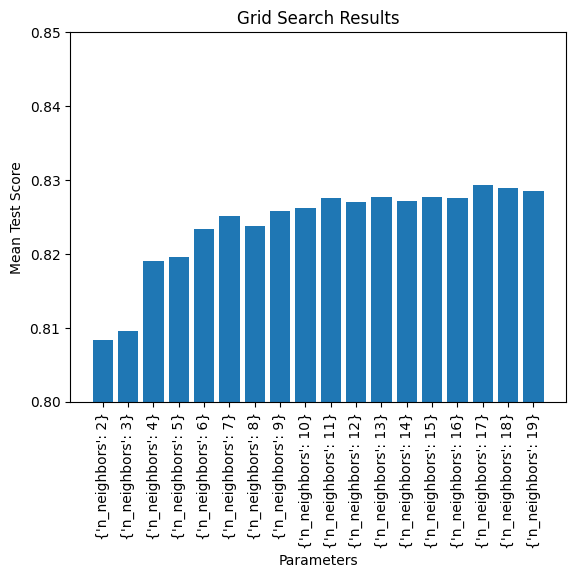

In [7]:
# 提取参数和得分
params = [str(params) for params in grid_search.cv_results_['params']]
scores = grid_search.cv_results_['mean_test_score']

# 绘制柱状图
plt.bar(params, scores)
plt.xlabel('Parameters')
plt.ylabel('Mean Test Score')
plt.title('Grid Search Results')
plt.xticks(rotation=90)
plt.ylim(0.80, 0.85)  # 范围从 0 到 1
plt.show()

In [8]:
# 设置参数范围
param_grid = {'n_neighbors': range(15, 30)}

# 创建 GridSearchCV 对象
grid_search = GridSearchCV(estimator=KNeighborsClassifier(metric='manhattan'), 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='accuracy')

# 执行参数搜索
grid_search.fit(X_train, y_train)

# 打印所有参数组合的训练结果
results_df = pd.DataFrame(grid_search.cv_results_)
print(results_df[['params', 'mean_test_score']])

# 输出最优参数和对应的评估结果
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

                 params  mean_test_score
0   {'n_neighbors': 15}         0.830253
1   {'n_neighbors': 16}         0.828059
2   {'n_neighbors': 17}         0.831240
3   {'n_neighbors': 18}         0.829485
4   {'n_neighbors': 19}         0.830911
5   {'n_neighbors': 20}         0.830472
6   {'n_neighbors': 21}         0.833050
7   {'n_neighbors': 22}         0.831514
8   {'n_neighbors': 23}         0.832117
9   {'n_neighbors': 24}         0.831021
10  {'n_neighbors': 25}         0.831514
11  {'n_neighbors': 26}         0.830418
12  {'n_neighbors': 27}         0.830966
13  {'n_neighbors': 28}         0.830253
14  {'n_neighbors': 29}         0.830801
Best parameters: {'n_neighbors': 21}
Best score: 0.833049789869295


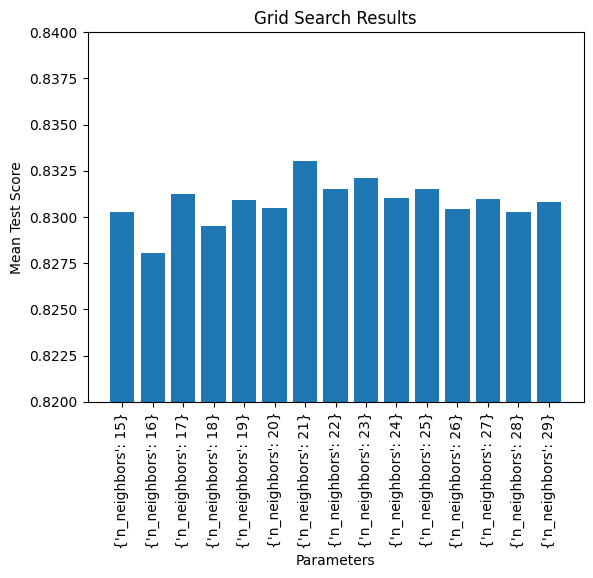

In [10]:
# 提取参数和得分
params = [str(params) for params in grid_search.cv_results_['params']]
scores = grid_search.cv_results_['mean_test_score']

# 绘制柱状图
plt.bar(params, scores)
plt.xlabel('Parameters')
plt.ylabel('Mean Test Score')
plt.title('Grid Search Results')
plt.xticks(rotation=90)
plt.ylim(0.82, 0.84)  # 范围从 0 到 1
plt.show()

In [11]:
# 设置参数范围
param_grid = {'metric': ['cityblock', 'cosine', 'euclidean', 'haversine', 'l1', 'l2', 'manhattan', 'nan_euclidean']}

# 创建 GridSearchCV 对象
grid_search = GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=21), 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='accuracy')

# 执行参数搜索
grid_search.fit(X_train, y_train)

# 打印所有参数组合的训练结果
results_df = pd.DataFrame(grid_search.cv_results_)
print(results_df[['params', 'mean_test_score']])

# 输出最优参数和对应的评估结果
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

/Users/zhousicheng/opt/miniconda3/envs/AI_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/zhousicheng/opt/miniconda3/envs/AI_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/zhousicheng/opt/miniconda3/envs/AI_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/zhousicheng/opt/miniconda3/envs/AI_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/zhousicheng/opt/miniconda3/envs/AI_env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File 

                        params  mean_test_score
0      {'metric': 'cityblock'}         0.833050
1         {'metric': 'cosine'}         0.830088
2      {'metric': 'euclidean'}         0.829375
3      {'metric': 'haversine'}              NaN
4             {'metric': 'l1'}         0.833050
5             {'metric': 'l2'}         0.829375
6      {'metric': 'manhattan'}         0.833050
7  {'metric': 'nan_euclidean'}         0.829375
Best parameters: {'metric': 'cityblock'}
Best score: 0.833049789869295


/Users/zhousicheng/opt/miniconda3/envs/AI_env/lib/python3.8/site-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [0.83304979 0.83008839 0.82937545        nan 0.83304979 0.82937545
 0.83304979 0.82937545]
  warnings.warn(


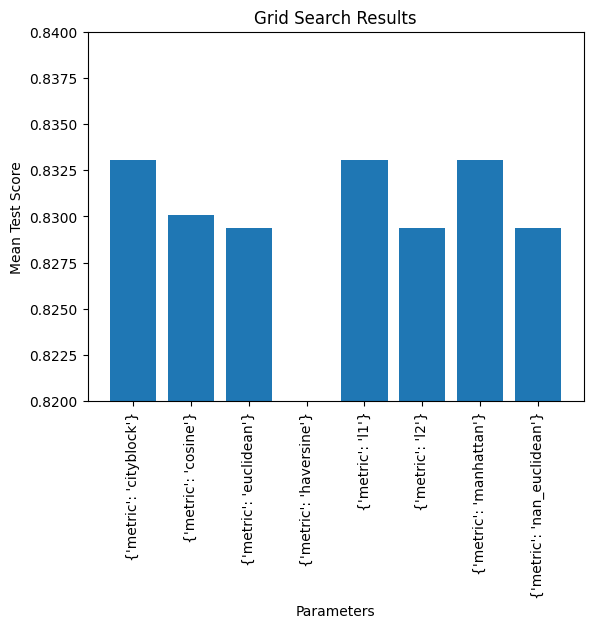

In [12]:
# 提取参数和得分
params = [str(params) for params in grid_search.cv_results_['params']]
scores = grid_search.cv_results_['mean_test_score']

# 绘制柱状图
plt.bar(params, scores)
plt.xlabel('Parameters')
plt.ylabel('Mean Test Score')
plt.title('Grid Search Results')
plt.xticks(rotation=90)
plt.ylim(0.82, 0.84)  # 范围从 0 到 1
plt.show()

In [13]:
# 创建最近邻分类器，并指定邻居数量
knn = KNeighborsClassifier(n_neighbors=21, metric='cityblock')
evaluate(knn)

/Users/zhousicheng/opt/miniconda3/envs/AI_env/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/zhousicheng/opt/miniconda3/envs/AI_env/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/zhousicheng/opt/miniconda3/envs/AI_env/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/zhousicheng/opt/miniconda3/envs/AI_env/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:2

Cross-validation scores: [0.83066462 0.83351612 0.84335235 0.8374287  0.83260202]
Average score: 0.8355127608274948


In [33]:
# 预测
# 读入文件
test_data_df = pd.read_csv("../data/testdata.csv")
test_data_df.at[9360, 'native.country'] = '?'
features = test_data_df.columns

# 数值填充
test_data_df.replace('Preschool', 1, inplace=True)
test_data_df.replace('1st-4th', 2, inplace=True)
test_data_df.replace('5th-6th', 3, inplace=True)
test_data_df.replace('7th-8th', 4, inplace=True)
test_data_df.replace('9th', 5, inplace=True)
test_data_df.replace('10th', 6, inplace=True)
test_data_df.replace('11th', 7, inplace=True)
test_data_df.replace('12th', 8, inplace=True)
test_data_df.replace('HS-grad', 9, inplace=True)
test_data_df.replace('Some-college', 10, inplace=True)
test_data_df.replace('Assoc-voc', 11, inplace=True)
test_data_df.replace('Assoc-acdm', 12, inplace=True)
test_data_df.replace('Bachelors', 13, inplace=True)
test_data_df.replace('Prof-school', 14, inplace=True)
test_data_df.replace('Masters', 15, inplace=True)
test_data_df.replace('Doctorate', 16, inplace=True)

# 对非数值信息独热编码
encoder = OneHotEncoder()
X_pred = encoder.fit_transform(test_data_df[['workclass', 'marital.status','occupation', 'relationship', 'race', 'sex', 'native.country']]).toarray()
X_pred = pd.concat([pd.DataFrame(X_pred), test_data_df[['age', 'fnlwgt', 'education', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']]], axis=1)
X_pred

# 数据归一化
X_pred.columns = X_pred.columns.astype(str)

# 使用StandardScaler进行Z-Score归一化
zscore_scaler = StandardScaler()
df_zscore_scaled = zscore_scaler.fit_transform(X_pred)

X_pred = pd.DataFrame(df_zscore_scaled)

# 相关性分析
correlation_matrix = X_pred.corr()

# 获取独热编码后的特征名称
encoded_feature_names = encoder.get_feature_names_out(['workclass', 'marital.status','occupation', 'relationship', 'race', 'sex', 'native.country'])
arr = np.array(['age', 'fnlwgt', 'education', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week'])
encoded_feature_names = np.append(encoded_feature_names, arr)
for i in range(len(encoded_feature_names)):
    print(i, encoded_feature_names[i])
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        if i >= j or i == 44: continue
        e = correlation_matrix[i][j]
        if e > 0.6 or e < -0.6: 
            print(i, encoded_feature_names[i], j, encoded_feature_names[j], e)
            if i in X_pred.columns: X_pred = X_pred.drop(i, axis=1)
                
X_pred

0 workclass_?
1 workclass_Federal-gov
2 workclass_Local-gov
3 workclass_Never-worked
4 workclass_Private
5 workclass_Self-emp-inc
6 workclass_Self-emp-not-inc
7 workclass_State-gov
8 workclass_Without-pay
9 marital.status_Divorced
10 marital.status_Married-AF-spouse
11 marital.status_Married-civ-spouse
12 marital.status_Married-spouse-absent
13 marital.status_Never-married
14 marital.status_Separated
15 marital.status_Widowed
16 occupation_?
17 occupation_Adm-clerical
18 occupation_Armed-Forces
19 occupation_Craft-repair
20 occupation_Exec-managerial
21 occupation_Farming-fishing
22 occupation_Handlers-cleaners
23 occupation_Machine-op-inspct
24 occupation_Other-service
25 occupation_Priv-house-serv
26 occupation_Prof-specialty
27 occupation_Protective-serv
28 occupation_Sales
29 occupation_Tech-support
30 occupation_Transport-moving
31 relationship_Husband
32 relationship_Not-in-family
33 relationship_Other-relative
34 relationship_Own-child
35 relationship_Unmarried
36 relationship_W

,1,2,3,4,5,6,7,8,9,10,...,81,82,83,84,85,86,88,89,90,91
0,-0.172409,-0.256716,-0.01431,0.658054,-0.185213,-0.300078,-0.19813,-0.02479,-0.398717,-0.02479,...,-0.020239,0.340884,-0.045293,-0.020239,2.365352,-0.304488,-0.036433,0.234750,-0.221203,1.577408
1,-0.172409,-0.256716,-0.01431,0.658054,-0.185213,-0.300078,-0.19813,-0.02479,-0.398717,-0.02479,...,-0.020239,0.340884,-0.045293,-0.020239,-0.347320,0.344807,1.927770,-0.148041,-0.221203,1.175093
2,-0.172409,-0.256716,-0.01431,0.658054,-0.185213,-0.300078,-0.19813,-0.02479,-0.398717,-0.02479,...,-0.020239,-2.933548,-0.045293,-0.020239,-0.200689,1.148321,-0.429274,-0.148041,-0.221203,-0.031851
3,-0.172409,-0.256716,-0.01431,0.658054,-0.185213,-0.300078,-0.19813,-0.02479,-0.398717,-0.02479,...,-0.020239,0.340884,-0.045293,-0.020239,-0.493951,0.375968,1.142089,-0.148041,-0.221203,0.370464
4,-0.172409,-0.256716,-0.01431,0.658054,-0.185213,-0.300078,-0.19813,-0.02479,-0.398717,-0.02479,...,-0.020239,0.340884,-0.045293,-0.020239,-1.373736,0.213488,-0.036433,-0.148041,-0.221203,-1.962962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9764,-0.172409,-0.256716,-0.01431,0.658054,-0.185213,-0.300078,-0.19813,-0.02479,-0.398717,-0.02479,...,-0.020239,0.340884,-0.045293,-0.020239,-0.787212,-0.782908,1.142089,-0.148041,-0.221203,-0.434166
9765,-0.172409,-0.256716,-0.01431,0.658054,-0.185213,-0.300078,-0.19813,-0.02479,-0.398717,-0.02479,...,-0.020239,0.340884,-0.045293,-0.020239,-0.567266,0.338517,-0.429274,-0.148041,-0.221203,-0.031851
9766,5.800159,-0.256716,-0.01431,-1.519632,-0.185213,-0.300078,-0.19813,-0.02479,-0.398717,-0.02479,...,-0.020239,0.340884,-0.045293,-0.020239,-0.200689,-0.052032,1.142089,-0.148041,-0.221203,-0.031851
9767,-0.172409,-0.256716,-0.01431,-1.519632,-0.185213,-0.300078,-0.19813,-0.02479,-0.398717,-0.02479,...,-0.020239,0.340884,-0.045293,-0.020239,-1.373736,-0.249955,-0.429274,-0.148041,-0.221203,-1.641110


In [35]:
best_clf = KNeighborsClassifier(n_neighbors=21, metric='cityblock')
best_clf.fit(encoded_features, train_label_df)
y_pred = best_clf.predict(X_pred)
y_pred

/Users/zhousicheng/opt/miniconda3/envs/AI_env/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([0, 1, 0, ..., 1, 0, 0])

In [36]:
# 指定要写入的文件路径和文件名
output_file = "../data/KNN_label.txt"

# 打开文件并写入预测结果
with open(output_file, "w") as file:
    for prediction in y_pred:
        file.write(str(prediction) + "\n")

print("预测结果已写入文件:", output_file)

预测结果已写入文件: ../data/KNN_label.txt


In [19]:
from sklearn.feature_selection import SelectKBest, f_classif

# 实例化SelectKBest对象，选择k个最好的特征
selector = SelectKBest(score_func=f_classif, k=10)

# 对训练数据进行特征选择
X_selected = selector.fit_transform(encoded_features, train_label_df)

# 打印选择的特征
selected_features = selector.get_support(indices=True)
print("Selected features:", selected_features)


Selected features: [11 18 24 29 32 39 81 83 84 86]


/Users/zhousicheng/opt/miniconda3/envs/AI_env/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
X_selected = encoded_features.values[:, selected_features]
# 执行交叉验证
scores = cross_val_score(KNeighborsClassifier(), X_selected, train_label_df, cv=5)  # cv=5 表示将数据集划分为5个折叠

# 打印每次交叉验证的得分
print("Cross-validation scores:", scores)

# 打印平均得分
print("Average score:", scores.mean())

/Users/zhousicheng/opt/miniconda3/envs/AI_env/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/zhousicheng/opt/miniconda3/envs/AI_env/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/zhousicheng/opt/miniconda3/envs/AI_env/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/zhousicheng/opt/miniconda3/envs/AI_env/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:2

Cross-validation scores: [0.82320684 0.82474227 0.82865292 0.82909171 0.83172444]
Average score: 0.8274836354053686


/Users/zhousicheng/opt/miniconda3/envs/AI_env/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [27]:
# 设置参数范围
param_grid = {'n_neighbors': range(2, 20)}

# 创建 GridSearchCV 对象
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='accuracy')

# 执行参数搜索
grid_search.fit(X_selected, train_label_df)

# 打印所有参数组合的训练结果
results_df = pd.DataFrame(grid_search.cv_results_)
print(results_df[['params', 'mean_test_score']])

# 输出最优参数和对应的评估结果
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

/Users/zhousicheng/opt/miniconda3/envs/AI_env/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/zhousicheng/opt/miniconda3/envs/AI_env/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/zhousicheng/opt/miniconda3/envs/AI_env/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/zhousicheng/opt/miniconda3/envs/AI_env/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:2

/Users/zhousicheng/opt/miniconda3/envs/AI_env/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/zhousicheng/opt/miniconda3/envs/AI_env/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/zhousicheng/opt/miniconda3/envs/AI_env/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/zhousicheng/opt/miniconda3/envs/AI_env/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:2

/Users/zhousicheng/opt/miniconda3/envs/AI_env/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/zhousicheng/opt/miniconda3/envs/AI_env/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/zhousicheng/opt/miniconda3/envs/AI_env/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/zhousicheng/opt/miniconda3/envs/AI_env/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:2

/Users/zhousicheng/opt/miniconda3/envs/AI_env/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/zhousicheng/opt/miniconda3/envs/AI_env/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/zhousicheng/opt/miniconda3/envs/AI_env/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/zhousicheng/opt/miniconda3/envs/AI_env/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:2

                 params  mean_test_score
0    {'n_neighbors': 2}         0.815199
1    {'n_neighbors': 3}         0.818313
2    {'n_neighbors': 4}         0.825421
3    {'n_neighbors': 5}         0.827484
4    {'n_neighbors': 6}         0.828931
5    {'n_neighbors': 7}         0.830730
6    {'n_neighbors': 8}         0.831739
7    {'n_neighbors': 9}         0.832529
8   {'n_neighbors': 10}         0.831564
9   {'n_neighbors': 11}         0.830906
10  {'n_neighbors': 12}         0.830994
11  {'n_neighbors': 13}         0.833451
12  {'n_neighbors': 14}         0.833494
13  {'n_neighbors': 15}         0.832485
14  {'n_neighbors': 16}         0.833714
15  {'n_neighbors': 17}         0.833144
16  {'n_neighbors': 18}         0.833319
17  {'n_neighbors': 19}         0.832617
Best parameters: {'n_neighbors': 16}
Best score: 0.8337140245280997


/Users/zhousicheng/opt/miniconda3/envs/AI_env/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/zhousicheng/opt/miniconda3/envs/AI_env/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


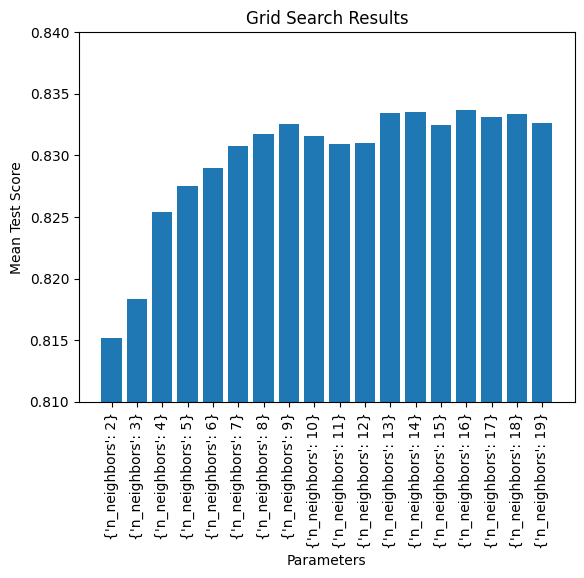

In [28]:
# 提取参数和得分
params = [str(params) for params in grid_search.cv_results_['params']]
scores = grid_search.cv_results_['mean_test_score']

# 绘制柱状图
plt.bar(params, scores)
plt.xlabel('Parameters')
plt.ylabel('Mean Test Score')
plt.title('Grid Search Results')
plt.xticks(rotation=90)
plt.ylim(0.81, 0.84)  # 范围从 0 到 1
plt.show()

In [32]:
# 设置参数范围
param_grid = {'metric': ['cityblock', 'cosine', 'euclidean', 'haversine', 'l1', 'l2', 'manhattan', 'nan_euclidean']}

# 创建 GridSearchCV 对象
grid_search = GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=16), 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='accuracy')

# 执行参数搜索
grid_search.fit(X_selected, train_label_df)

# 打印所有参数组合的训练结果
results_df = pd.DataFrame(grid_search.cv_results_)
print(results_df[['params', 'mean_test_score']])

# 输出最优参数和对应的评估结果
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

/Users/zhousicheng/opt/miniconda3/envs/AI_env/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/zhousicheng/opt/miniconda3/envs/AI_env/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/zhousicheng/opt/miniconda3/envs/AI_env/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/zhousicheng/opt/miniconda3/envs/AI_env/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:2

/Users/zhousicheng/opt/miniconda3/envs/AI_env/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/zhousicheng/opt/miniconda3/envs/AI_env/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/zhousicheng/opt/miniconda3/envs/AI_env/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/zhousicheng/opt/miniconda3/envs/AI_env/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:2

                        params  mean_test_score
0      {'metric': 'cityblock'}         0.832354
1         {'metric': 'cosine'}         0.834635
2      {'metric': 'euclidean'}         0.833714
3      {'metric': 'haversine'}              NaN
4             {'metric': 'l1'}         0.832354
5             {'metric': 'l2'}         0.833714
6      {'metric': 'manhattan'}         0.832354
7  {'metric': 'nan_euclidean'}         0.832178
Best parameters: {'metric': 'cosine'}
Best score: 0.8346354909320641


/Users/zhousicheng/opt/miniconda3/envs/AI_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/zhousicheng/opt/miniconda3/envs/AI_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/zhousicheng/opt/miniconda3/envs/AI_env/lib/python3.8/site-packages/sklearn/neighbors/_classification.py", line 215, in fit
    return self._fit(X, y)
  File "/Users/zhousicheng/opt/miniconda3/envs/AI_env/lib/python3.8/site-packages/skl

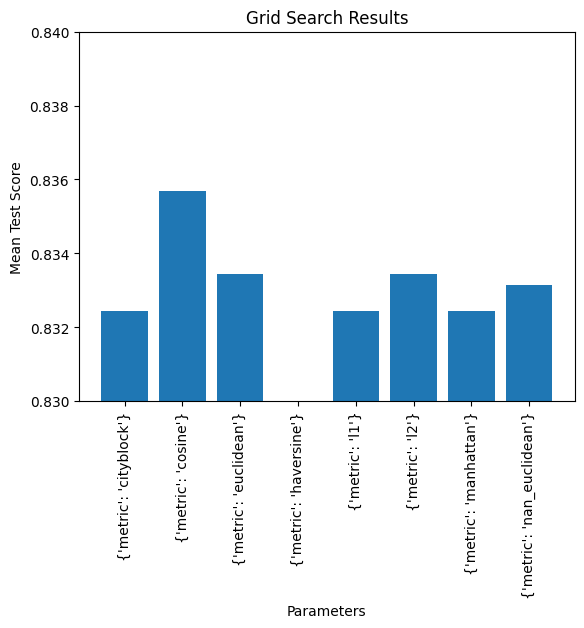

In [30]:
# 提取参数和得分
params = [str(params) for params in grid_search.cv_results_['params']]
scores = grid_search.cv_results_['mean_test_score']

# 绘制柱状图
plt.bar(params, scores)
plt.xlabel('Parameters')
plt.ylabel('Mean Test Score')
plt.title('Grid Search Results')
plt.xticks(rotation=90)
plt.ylim(0.83, 0.84)  # 范围从 0 到 1
plt.show()

In [31]:
# 执行交叉验证
scores = cross_val_score(KNeighborsClassifier(metric='cosine', n_neighbors=16), X_selected, train_label_df, cv=5)  # cv=5 表示将数据集划分为5个折叠

# 打印每次交叉验证的得分
print("Cross-validation scores:", scores)

# 打印平均得分
print("Average score:", scores.mean())

/Users/zhousicheng/opt/miniconda3/envs/AI_env/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/zhousicheng/opt/miniconda3/envs/AI_env/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/zhousicheng/opt/miniconda3/envs/AI_env/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/zhousicheng/opt/miniconda3/envs/AI_env/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:2

Cross-validation scores: [0.83220004 0.82496161 0.84159719 0.83677051 0.83764809]
Average score: 0.8346354909320641
